In [106]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [108]:
weather = pd.read_csv('weather_dataset.csv',index_col="DATE")
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
01-01-1970,IN020081700,"MADURAI, IN",0.16,NaN,NaN,NaN
02-01-1970,IN020081700,"MADURAI, IN",0.00,NaN,NaN,NaN
03-01-1970,IN020081700,"MADURAI, IN",0.00,NaN,NaN,NaN
04-01-1970,IN020081700,"MADURAI, IN",0.00,NaN,NaN,NaN
05-01-1970,IN020081700,"MADURAI, IN",0.00,NaN,NaN,NaN
...,...,...,...,...,...,...
04-09-2024,IN020081700,"MADURAI, IN",NaN,89.0,102.0,78.0
05-09-2024,IN020081700,"MADURAI, IN",NaN,90.0,102.0,78.0
06-09-2024,IN020081700,"MADURAI, IN",NaN,90.0,105.0,80.0


In [110]:
weather.isnull().sum()

STATION       0
NAME          0
PRCP       1984
TAVG        365
TMAX       1454
TMIN       1173
dtype: int64

In [112]:
nullpct = weather.isnull().sum()/weather.shape[0]
nullpct

STATION    0.000000
NAME       0.000000
PRCP       0.538107
TAVG       0.098996
TMAX       0.394359
TMIN       0.318145
dtype: float64

In [114]:
valid_col = weather.columns[nullpct < .05]
valid_col

Index(['STATION', 'NAME'], dtype='object')

In [116]:
numeric_cols = weather.select_dtypes(include=['number']).columns
means = weather[numeric_cols].mean()
weather.fillna(value=means, inplace=True)
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
01-01-1970,IN020081700,"MADURAI, IN",0.160000,84.919025,96.961935,75.435163
02-01-1970,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163
03-01-1970,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163
04-01-1970,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163
05-01-1970,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163
...,...,...,...,...,...,...
04-09-2024,IN020081700,"MADURAI, IN",0.205942,89.000000,102.000000,78.000000
05-09-2024,IN020081700,"MADURAI, IN",0.205942,90.000000,102.000000,78.000000
06-09-2024,IN020081700,"MADURAI, IN",0.205942,90.000000,105.000000,80.000000


In [118]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
TAVG       float64
TMAX       float64
TMIN       float64
dtype: object

In [172]:
weather.index

DatetimeIndex(['1970-01-15', '1970-01-16', '1970-01-17', '1970-01-18',
               '1970-01-19', '1970-01-20', '1970-01-21', '1970-01-22',
               '1970-01-23', '1970-01-24',
               ...
               '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02',
               '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06',
               '2024-09-07', '2024-09-08'],
              dtype='datetime64[ns]', name='DATE', length=3673, freq=None)

In [174]:
weather.index = pd.to_datetime(weather.index)

In [176]:
weather.index.year.value_counts().sort_index()

DATE
1970    351
1975      5
1976     24
1977     46
1978     51
1984     16
1985      5
1986      2
1987      3
1988      1
1998      1
2015     25
2016    366
2017    365
2018    363
2019    365
2020    365
2021    361
2022    362
2023    353
2024    243
Name: count, dtype: int64

<Axes: xlabel='DATE'>

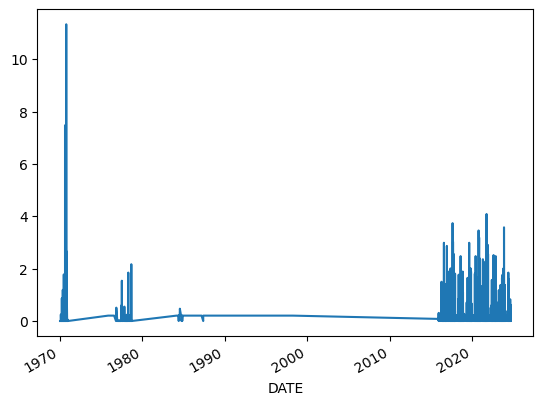

In [178]:
weather["PRCP"].plot()

In [180]:
weather["target"] = weather.shift(-1)["TMAX"]
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-16,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-17,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-18,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-19,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,IN020081700,"MADURAI, IN",0.205942,89.000000,102.000000,78.000000,102.000000,101.000000,0.009901,79.000000,-0.012658,0.205942,0.0,99.057834,0.029701,77.531083,0.006048,0.161812,0.272727
2024-09-05,IN020081700,"MADURAI, IN",0.205942,90.000000,102.000000,78.000000,105.000000,102.000000,0.000000,78.666667,-0.008475,0.205942,0.0,99.629262,0.023796,77.602512,0.005122,0.176522,0.166667
2024-09-06,IN020081700,"MADURAI, IN",0.205942,90.000000,105.000000,80.000000,104.000000,103.000000,0.019417,78.666667,0.016949,0.205942,0.0,100.203410,0.047869,77.745369,0.029000,0.176522,0.166667


In [182]:
weather.ffill(inplace=True)
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-16,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-17,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-18,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
1970-01-19,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,0.0,96.961935,0.000000,75.435163,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,IN020081700,"MADURAI, IN",0.205942,89.000000,102.000000,78.000000,102.000000,101.000000,0.009901,79.000000,-0.012658,0.205942,0.0,99.057834,0.029701,77.531083,0.006048,0.161812,0.272727
2024-09-05,IN020081700,"MADURAI, IN",0.205942,90.000000,102.000000,78.000000,105.000000,102.000000,0.000000,78.666667,-0.008475,0.205942,0.0,99.629262,0.023796,77.602512,0.005122,0.176522,0.166667
2024-09-06,IN020081700,"MADURAI, IN",0.205942,90.000000,105.000000,80.000000,104.000000,103.000000,0.019417,78.666667,0.016949,0.205942,0.0,100.203410,0.047869,77.745369,0.029000,0.176522,0.166667


In [184]:
numeric_weather = weather.select_dtypes(include=['number'])
correlation_matrix = numeric_weather.corr()
print(correlation_matrix)

                         PRCP      TAVG      TMAX      TMIN    target  \
PRCP                 1.000000 -0.070699 -0.003486 -0.093865 -0.026860   
TAVG                -0.070699  1.000000  0.732785  0.710564  0.716941   
TMAX                -0.003486  0.732785  1.000000  0.510444  0.604431   
TMIN                -0.093865  0.710564  0.510444  1.000000  0.508992   
target              -0.026860  0.716941  0.604431  0.508992  1.000000   
rolling_3_TMAX       0.006040  0.801109  0.853266  0.594511  0.681326   
rolling_3_TMAX_pct  -0.016802  0.091013  0.518591  0.001749  0.038810   
rolling_3_TMIN      -0.038120  0.757700  0.579604  0.874223  0.573605   
rolling_3_TMIN_pct  -0.122964  0.083471 -0.002981  0.467801  0.005010   
rolling_3_PRCP       0.590951 -0.081548 -0.036318 -0.066871 -0.045439   
rolling_3_PRCP_pct   0.447502 -0.015672  0.018984 -0.068257 -0.011953   
rolling_14_TMAX      0.019928  0.793222  0.720645  0.638139  0.669208   
rolling_14_TMAX_pct -0.027553  0.196846  0.661708  

In [186]:
rr=Ridge(alpha=.1)

In [188]:
predictors = weather.columns[~weather.columns.isin(["target","NAME","STATION"])]
predictors

Index(['PRCP', 'TAVG', 'TMAX', 'TMIN', 'rolling_3_TMAX', 'rolling_3_TMAX_pct',
       'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_TMIN', 'rolling_14_TMIN_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct'],
      dtype='object')

In [190]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [192]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2024-08-17,97.000000,97.051246,0.051246
2024-08-18,97.000000,98.297269,1.297269
2024-08-19,95.000000,96.433582,1.433582
2024-08-20,94.000000,96.403823,2.403823
2024-08-21,94.000000,95.796622,1.796622
2024-08-22,96.961935,95.734361,1.227573
2024-08-23,96.961935,96.220848,0.741086
2024-08-24,96.961935,97.040127,0.078192
2024-08-25,96.961935,98.619110,1.657175


In [194]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.7815599107652278

In [196]:
predictions["diff"].mean()

1.7815599107652278

In [198]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2024-08-26,103.000000,97.634906,5.365094
2024-09-05,105.000000,101.170116,3.829884
2024-09-02,102.000000,98.999888,3.000112
2024-09-06,104.000000,101.390319,2.609681
2024-08-27,101.000000,98.483592,2.516408
2024-09-03,102.000000,99.513280,2.486720
2024-08-20,94.000000,96.403823,2.403823
2024-08-29,101.000000,98.772911,2.227089
2024-08-31,101.000000,99.084075,1.915925


In [200]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        weather = compute_rolling(weather, horizon, col)

In [202]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-16,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-17,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-18,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-19,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,IN020081700,"MADURAI, IN",0.205942,89.000000,102.000000,78.000000,102.000000,101.000000,0.009901,79.000000,-0.012658,0.205942,0.0,99.057834,0.029701,77.531083,0.006048,0.161812,0.272727
2024-09-05,IN020081700,"MADURAI, IN",0.205942,90.000000,102.000000,78.000000,105.000000,102.000000,0.000000,78.666667,-0.008475,0.205942,0.0,99.629262,0.023796,77.602512,0.005122,0.176522,0.166667
2024-09-06,IN020081700,"MADURAI, IN",0.205942,90.000000,105.000000,80.000000,104.000000,103.000000,0.019417,78.666667,0.016949,0.205942,0.0,100.203410,0.047869,77.745369,0.029000,0.176522,0.166667


In [204]:
weather=weather.iloc[14:,:]
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-29,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,96.961935,0.000000,75.435163,0.000000,0.000000,NaN
1970-01-30,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,96.961935,0.000000,75.435163,0.000000,0.000000,NaN
1970-01-31,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,96.961935,0.000000,75.435163,0.000000,0.000000,NaN
1970-02-01,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,96.961935,0.000000,75.435163,0.000000,0.000000,NaN
1970-02-02,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,0.000000,0.000000,NaN,96.961935,0.000000,75.435163,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,IN020081700,"MADURAI, IN",0.205942,89.000000,102.000000,78.000000,102.000000,101.000000,0.009901,79.000000,-0.012658,0.205942,0.0,99.057834,0.029701,77.531083,0.006048,0.161812,0.272727
2024-09-05,IN020081700,"MADURAI, IN",0.205942,90.000000,102.000000,78.000000,105.000000,102.000000,0.000000,78.666667,-0.008475,0.205942,0.0,99.629262,0.023796,77.602512,0.005122,0.176522,0.166667
2024-09-06,IN020081700,"MADURAI, IN",0.205942,90.000000,105.000000,80.000000,104.000000,103.000000,0.019417,78.666667,0.016949,0.205942,0.0,100.203410,0.047869,77.745369,0.029000,0.176522,0.166667


In [206]:
weather=weather.fillna(0)

In [208]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["TMAX", "TMIN", "PRCP"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-29,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,...,75.435163,0.000000,0.000000,0.000000,96.961935,96.961935,75.435163,75.435163,0.000000,0.000000
1970-01-30,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,...,75.435163,0.000000,0.000000,0.000000,96.961935,96.961935,75.435163,75.435163,0.000000,0.000000
1970-01-31,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,...,75.435163,0.000000,0.000000,0.000000,96.961935,96.961935,75.435163,75.435163,0.000000,0.000000
1970-02-01,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,...,75.435163,0.000000,0.000000,0.000000,96.961935,96.961935,75.435163,75.435163,0.000000,0.000000
1970-02-02,IN020081700,"MADURAI, IN",0.000000,84.919025,96.961935,75.435163,96.961935,96.961935,0.000000,75.435163,...,75.435163,0.000000,0.000000,0.000000,96.961935,96.961935,75.435163,75.435163,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,IN020081700,"MADURAI, IN",0.205942,89.000000,102.000000,78.000000,102.000000,101.000000,0.009901,79.000000,...,77.531083,0.006048,0.161812,0.272727,97.367750,96.892387,75.862610,75.830549,0.225440,0.336188
2024-09-05,IN020081700,"MADURAI, IN",0.205942,90.000000,102.000000,78.000000,105.000000,102.000000,0.000000,78.666667,...,77.602512,0.005122,0.176522,0.166667,97.383724,97.342873,75.869981,75.260939,0.225372,0.281252
2024-09-06,IN020081700,"MADURAI, IN",0.205942,90.000000,105.000000,80.000000,104.000000,103.000000,0.019417,78.666667,...,77.745369,0.029000,0.176522,0.166667,97.409897,97.384774,75.884173,75.974065,0.225306,0.201971


In [210]:
predictors = weather.columns[~weather.columns.isin(["target","NAME","STATION"])]
predictors

Index(['PRCP', 'TAVG', 'TMAX', 'TMIN', 'rolling_3_TMAX', 'rolling_3_TMAX_pct',
       'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_TMIN', 'rolling_14_TMIN_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct', 'month_avg_TMAX', 'day_avg_TMAX',
       'month_avg_TMIN', 'day_avg_TMIN', 'month_avg_PRCP', 'day_avg_PRCP'],
      dtype='object')

In [212]:
predictions = backtest(weather, rr, predictors)

In [214]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.2450645804229246

In [216]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
2024-09-05,105.0,100.887850,4.112150
2024-09-02,102.0,98.993142,3.006858
2024-09-06,104.0,101.082386,2.917614
2024-09-03,102.0,99.459194,2.540806
2024-09-07,103.0,100.928214,2.071786
2024-08-31,101.0,99.173350,1.826650
2024-09-04,102.0,100.225339,1.774661
2024-09-08,103.0,101.468671,1.531329
2024-09-01,99.0,98.576274,0.423726


In [218]:
weather.loc["2023-09-07": "2023-09-17"]

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
2023-09-07,IN020081700,"MADURAI, IN",0.205942,85.0,95.000000,76.000000,96.961935,94.987312,0.000134,75.811721,...,75.829356,0.002250,0.320828,-0.358092,97.192634,96.538638,75.733772,75.526739,0.231217,0.201530
2023-09-08,IN020081700,"MADURAI, IN",0.000000,87.0,96.961935,76.000000,99.000000,96.307956,0.006790,76.000000,...,75.829356,0.002250,0.306118,-1.000000,97.191757,97.196845,75.734784,75.922832,0.230338,0.130419
2023-09-09,IN020081700,"MADURAI, IN",0.205942,89.0,99.000000,78.000000,99.000000,96.987312,0.020752,76.666667,...,75.829356,0.028625,0.306118,-0.327245,97.198607,98.209534,75.743364,75.652258,0.230246,0.296635
2023-09-10,IN020081700,"MADURAI, IN",0.205942,89.0,99.000000,81.000000,101.000000,98.320645,0.006910,78.333333,...,76.043641,0.065178,0.306118,-0.327245,97.205404,98.622522,75.763201,76.300499,0.230154,0.115428
2023-09-11,IN020081700,"MADURAI, IN",0.205942,88.0,101.000000,75.435163,99.000000,99.666667,0.013378,78.145054,...,76.043641,-0.008002,0.306118,-0.327245,97.219670,97.356715,75.761968,75.936863,0.230063,0.210883
2023-09-12,IN020081700,"MADURAI, IN",0.205942,89.0,99.000000,78.000000,102.000000,99.666667,-0.006689,78.145054,...,76.226844,0.023262,0.312257,-0.340471,97.226338,97.684774,75.770350,76.343516,0.229972,0.195377
2023-09-13,IN020081700,"MADURAI, IN",0.205942,89.0,102.000000,80.000000,101.000000,100.666667,0.013245,77.811721,...,76.655415,0.043631,0.251253,-0.180338,97.244150,97.384774,75.786132,76.430549,0.229883,0.156160
2023-09-14,IN020081700,"MADURAI, IN",0.205942,88.0,101.000000,78.000000,103.000000,100.666667,0.003311,78.666667,...,76.798273,0.015648,0.260249,-0.208671,97.258112,98.431756,75.794362,76.478388,0.229794,0.208857
2023-09-15,IN020081700,"MADURAI, IN",0.205942,88.0,103.000000,77.000000,96.961935,102.000000,0.009804,78.333333,...,76.910047,0.001170,0.274959,-0.251006,97.279378,97.488580,75.798827,76.030549,0.229705,0.336783


<Axes: xlabel='diff'>

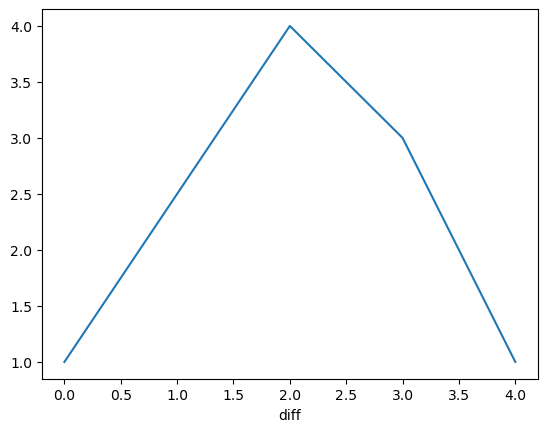

In [220]:
predictions["diff"].round().value_counts().sort_index().plot()

In [222]:
target_date = '2024-10-20'  # Replace with your specific date

In [224]:
# Filter data up to the target_date
data_up_to_target = weather[weather.index <= target_date]

# Ensure data is prepared for prediction
# Example: compute rolling statistics if needed
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        data_up_to_target = compute_rolling(data_up_to_target, horizon, col)


In [226]:
# Prepare the latest data row for prediction
latest_data_for_prediction = data_up_to_target.iloc[-1:]

# Make the prediction
prediction = rr.predict(latest_data_for_prediction[predictors])

print("Predicted weather for", target_date, "is:", prediction)


Predicted weather for 2024-10-20 is: [101.46867099]
